<a href="https://colab.research.google.com/github/Manojgharge07/Statistics_Basic/blob/main/Statistics_8_Chi_Square_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chi-Square Test for Feature Selection in Machine learning

### Feature selection always plays a key role in machine learning

We always wonder where the Chi-Square test is useful in machine learning and how this test makes a difference. Feature selection is an important problem in machine learning, where we will be having several features in line and have to select the best features to build the model. The chi-square test helps you to solve the problem in feature selection by testing the relationship between the features. In this article, I will guide through

a. Chi-Square distribution.

b. Chi-Square Test for Feature Selection

c. Chi-Square Test using Python

# Chi-Square distribution

A random variable ꭓ follows chi-square distribution if it can be written as a sum of squared standard normal variables.

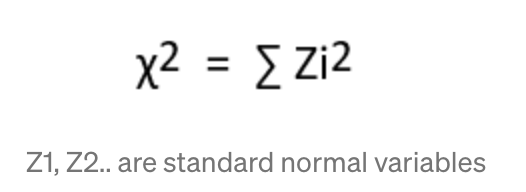

# Degrees of freedom:

Degrees of freedom refers to the maximum number of logically independent values, which have the freedom to vary. In simple words, it can be defined as the total number of observations minus the number of independent constraints imposed on the observations.

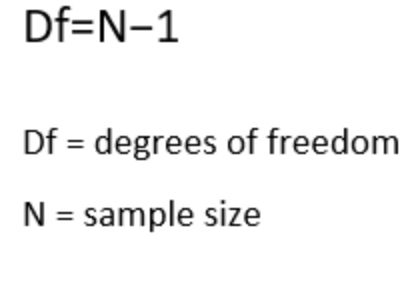

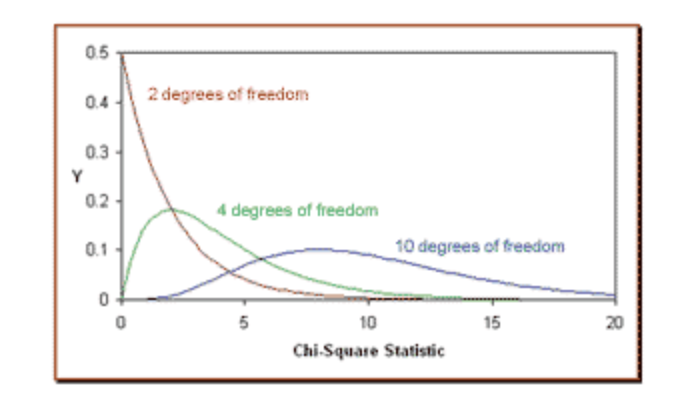

In the above figure, we could see Chi-Square distribution for different degrees of freedom. We can also observe that as the degrees of freedom increase Chi-Square distribution approximates to normal distribution.

# Chi-Square Test for Feature Selection
A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

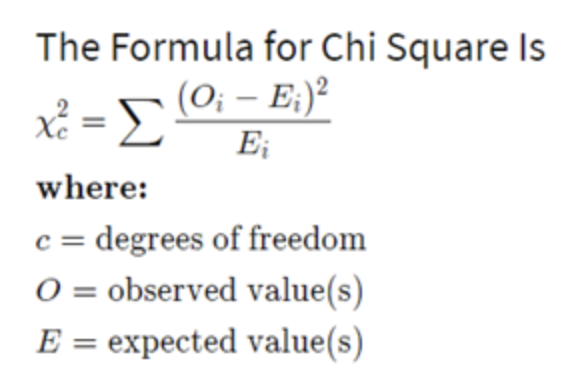

Let’s consider a scenario where we need to determine the relationship between the independent category feature (predictor) and dependent category feature(response). In feature selection, we aim to select the features which are highly dependent on the response.

When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect(dependence is correct). In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

# Steps for Chi-Square Test with an example:
Consider a data-set where we have to determine why customers are leaving the bank, let’s perform a Chi-Square test for two variables. Gender of a customer with values as Male/Female as the predictor and Exited describes whether a customer is leaving the bank with values Yes/No as the response. In this test we will check is there any relationship between Gender and Exited.

Steps to perform the Chi-Square Test:

1. Define Hypothesis.
2. Build a Contingency table.
3. Find the expected values.
4. Calculate the Chi-Square statistic.
5. Accept or Reject the Null Hypothesis.

# 1.Define Hypothesis
Null Hypothesis (H0): Two variables are independent.

Alternate Hypothesis (H1): Two variables are not independent.

# 2. Contingency table
A table showing the distribution of one variable in rows and another in columns. It is used to study the relation between two variables.

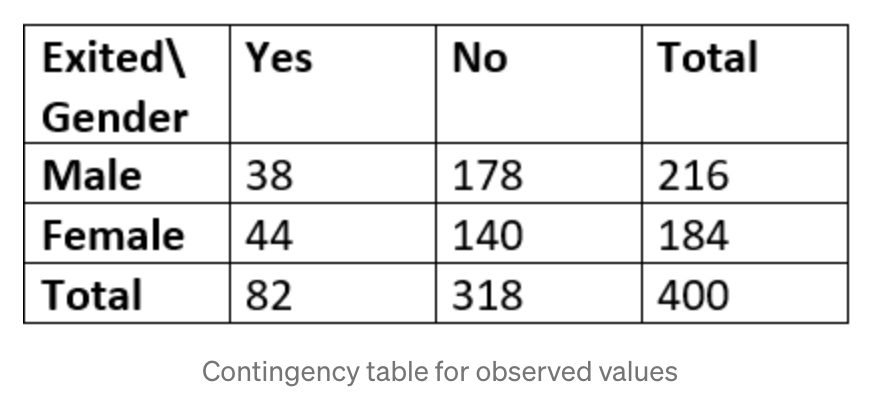

Degrees of freedom for contingency table is given as (r-1) * (c-1) where r,c are rows and columns. Here df = (2–1) * (2–1) = 1.

In the above table we have figured out all observed values and our next steps are to find expected values, get the Chi-Square value and check for relationship.

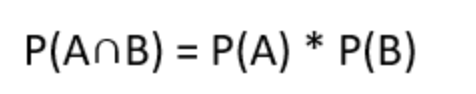

Let’s calculate the expected value for the first cell that is those who are Males and are Exited from the bank.

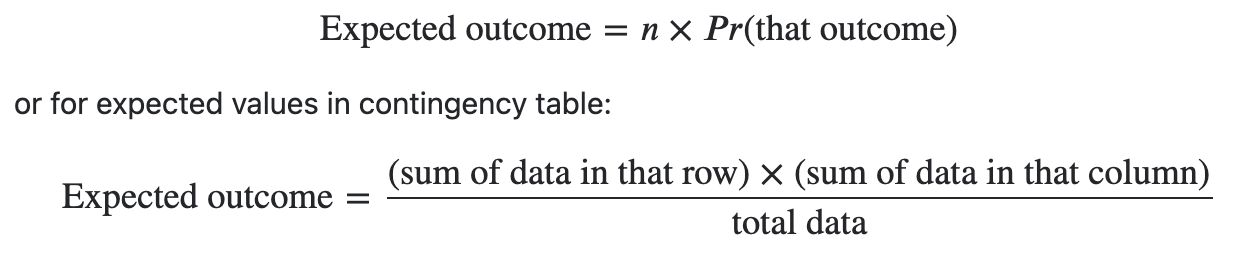

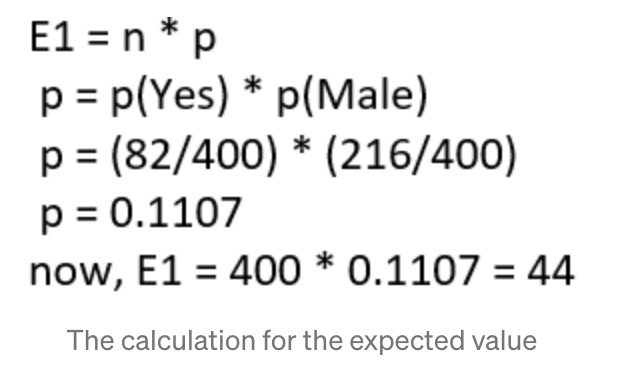

In similar, we calculate E2, E3, E4 and get the following results.

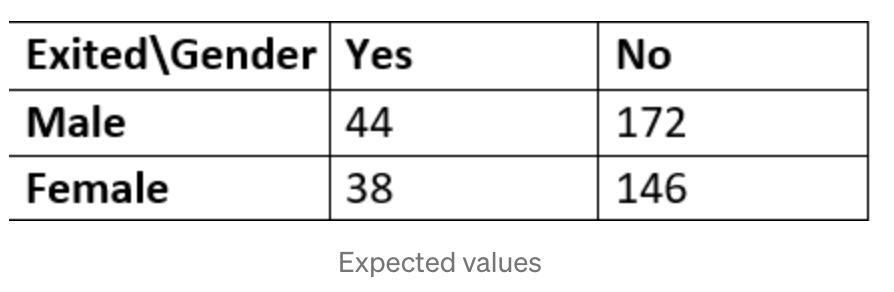

# 4. Calculate Chi-Square value
Summarizing the observed values and calculated expected values into a table and determine the Chi-Square value.

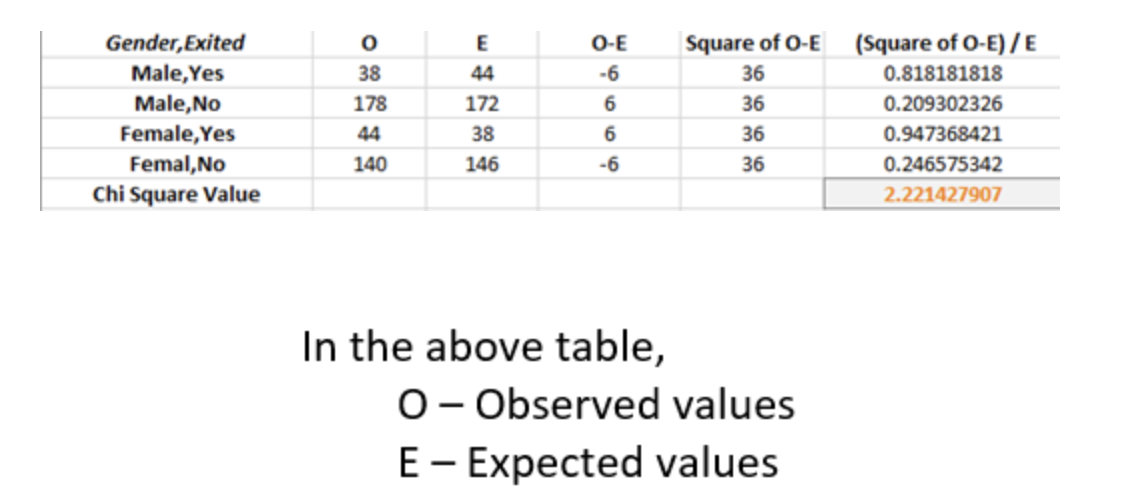

We can see Chi-Square is calculated as 2.22 by using the Chi-Square statistic formula.

5. Accept or Reject the Null Hypothesis With 95% confidence that is alpha = 0.05, we will check the calculated Chi-Square value falls in the acceptance or rejection region.
Having degrees of freedom =1(calculated with contingency table) and alpha =0.05 the Chi-Square value is 3.84.

The Chi-Square values can be determined with the Chi-Square table.

The chi-square distribution is the right side since the difference in Observed and Expected is large.

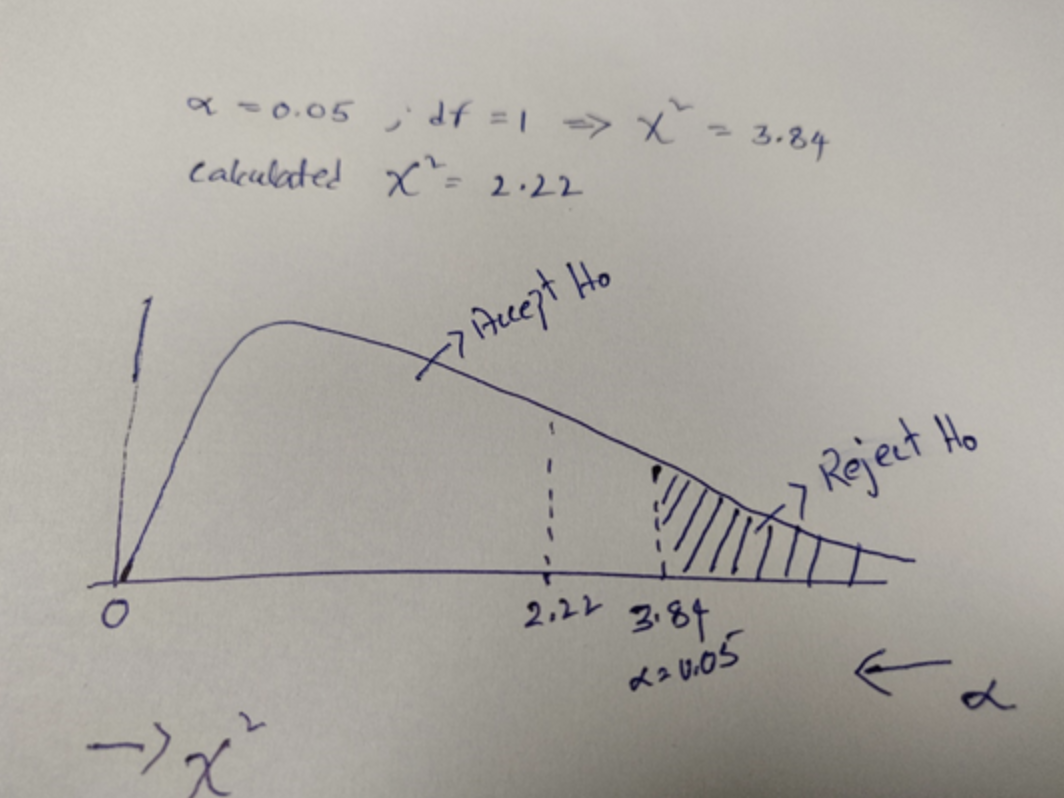

In the above fig, we can see Chi-Square ranges from 0 to inf and alpha ranges from 0 to 1 in the opposite direction. We will reject the Null hypothesis if Chi-Square value falls in the error region (alpha from 0 to 0.05 ).

So here we are accepting the null hypothesis since the Chi-Square value is less than the critical Chi-Square value.

**To conclude the two variables are independent, Gender variable cannot be selected for training the model.**

# Perform Chi-Square test for Bank Churn prediction (find out different patterns on customer leaves the bank) . Here I am considering only few columns to make things clear

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
churn_df = pd.read_csv("/content/drive/MyDrive/All CSV files/Churn_Modelling.csv")

In [3]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_df = churn_df[['Geography',	'Gender',	'HasCrCard',	'IsActiveMember',	'Exited']]
churn_df.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


In [6]:
churn_df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# Here we have 4 category predictors and one category response. Exited, the response column represnts customer left the bank or not.

In [7]:
label_encoder = LabelEncoder()
churn_df['Geography'] = label_encoder.fit_transform(churn_df['Geography'])
churn_df['Gender'] = label_encoder.fit_transform(churn_df['Gender'])

# Chi-Square test

In [8]:
from sklearn.feature_selection import chi2

In [9]:
X = churn_df.drop('Exited',axis=1)
y = churn_df['Exited']

In [10]:
chi_scores = chi2(X,y)
chi_scores

(array([ 11.85325057,  51.53992627,   0.15004097, 118.19941432]),
 array([5.75607838e-04, 7.01557451e-13, 6.98496209e-01, 1.56803624e-27]))

here first array represents chi square values and second array represnts p-values

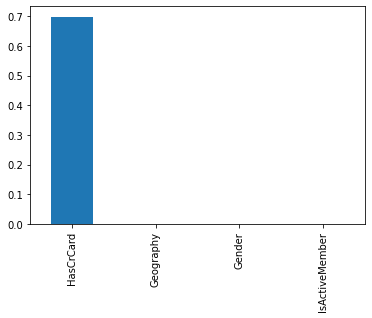

In [13]:
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True, ascending = False)
p_values.plot.bar()

# Since HasCrCard has higher the p-value, it says that this variables is independent of the repsone and can not be considered for model training

# So far we learned about having the categorical response and categorical predictor but what if we have the continuous response and categorical predictor ??? We will use ANOVA.